In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D, UpSampling2D,Dropout

In [2]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
# to get the shape of the data
print("x_train shape:",x_train.shape)
print("x_test shape", x_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28)
x_test shape (10000, 28, 28)


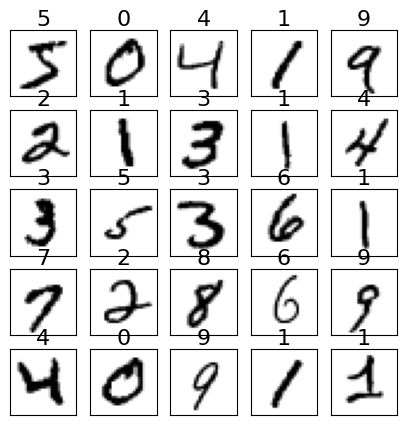

In [13]:
plt.figure(figsize = (5,5))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.title(str(y_train[i]),fontsize = 16, color = 'black', pad = 2)
  plt.imshow(x_train[i], cmap = plt.cm.binary )
  plt.xticks([])
  plt.yticks([])

plt.show()

In [4]:
val_images = x_test[:9000]
test_images = x_test[9000:]

In [5]:
val_images = val_images.astype('float32') / 255.0
val_images = np.reshape(val_images,(val_images.shape[0],28,28,1))

test_images = test_images.astype('float32') / 255.0
test_images = np.reshape(test_images,(test_images.shape[0],28,28,1))

train_images = x_train.astype("float32") / 255.0
train_images = np.reshape(train_images, (train_images.shape[0],28,28,1))

In [6]:
factor = 0.39
train_noisy_images = train_images + factor * np.random.normal(loc = 0.0,scale = 1.0,size = train_images.shape)
val_noisy_images = val_images + factor * np.random.normal(loc = 0.0,scale = 1.0,size = val_images.shape)
test_noisy_images = test_images + factor * np.random.normal(loc = 0.0,scale = 1.0,size = test_images.shape)

# here maximum pixel value for our images may exceed 1 so we have to clip the images
train_noisy_images = np.clip(train_noisy_images,0.,1.)
val_noisy_images = np.clip(val_noisy_images,0.,1.)
test_noisy_images = np.clip(test_noisy_images,0.,1.)

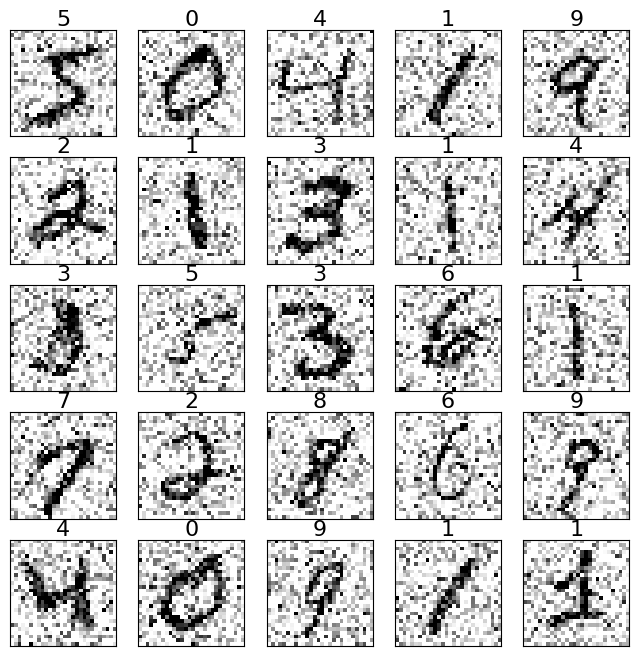

In [7]:
plt.figure(figsize = (8,8))

for i in range(25):
      plt.subplot(5,5,i+1)
      plt.title(str(y_train[i]),fontsize = 16, color = 'black', pad = 2)
      plt.imshow(train_noisy_images[i].reshape(1,28,28)[0], cmap = plt.cm.binary )
      plt.xticks([])
      plt.yticks([])

plt.show()

In [8]:
model = Sequential()
# encoder network
model.add(Conv2D(filters = 128, kernel_size = (2,2), activation = 'relu', padding = 'same', input_shape = (28,28,1)))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(filters = 128, kernel_size = (2,2), activation = 'relu', padding = 'same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(filters = 256, kernel_size = (2,2),strides = (2,2), activation = 'relu', padding = 'same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(filters = 256, kernel_size = (2,2), activation = 'relu', padding = 'same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(filters = 512, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(filters = 512, kernel_size = (2,2),strides = (2,2), activation = 'relu', padding = 'same'))
# decoder network
model.add(Conv2D(filters = 512, kernel_size = (2,2), activation = 'relu', padding = 'same'))

model.add(tf.keras.layers.Conv2DTranspose(filters = 512, kernel_size = (2,2), strides = (2,2),activation = 'relu', padding = 'same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(filters = 256, kernel_size = (2,2), activation = 'relu', padding = 'same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(filters = 256, kernel_size = (2,2), activation = 'relu', padding = 'same'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(filters = 128, kernel_size = (2,2), activation = 'relu', padding = 'same'))

model.add(tf.keras.layers.Conv2DTranspose(filters = 128, kernel_size = (2,2),strides = (2,2), activation = 'relu', padding = 'same'))
model.add(Conv2D(filters = 64, kernel_size = (2,2), activation = 'relu', padding = 'same'))
model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(filters = 1, kernel_size = (2,2), activation = 'relu', padding = 'same'))


# to get the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 128)       640       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 128)       512       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 128)       65664     
                                                                 
 batch_normalization_1 (Bat  (None, 28, 28, 128)       512       
 chNormalization)                                                
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 256)       131328    
                                                                 
 batch_normalization_2 (Bat  (None, 14, 14, 256)       1

In [9]:
OPTIMIZER =  tf.keras.optimizers.Adam(learning_rate = 0.001)
LOSS = 'mean_squared_error'
model.compile(optimizer =OPTIMIZER, loss = LOSS, metrics = ['accuracy'])

In [12]:
EPOCHS = 1
BATCH_SIZE = 256
VALIDATION = (val_noisy_images, val_images)
history = model.fit(train_noisy_images, train_images,batch_size = BATCH_SIZE,epochs = EPOCHS, validation_data = VALIDATION)

235/235 [==============================] - 7163s 30s/step - loss: 0.0094 - accuracy: 0.8142 - val_loss: 0.0535 - val_accuracy: 0.8105


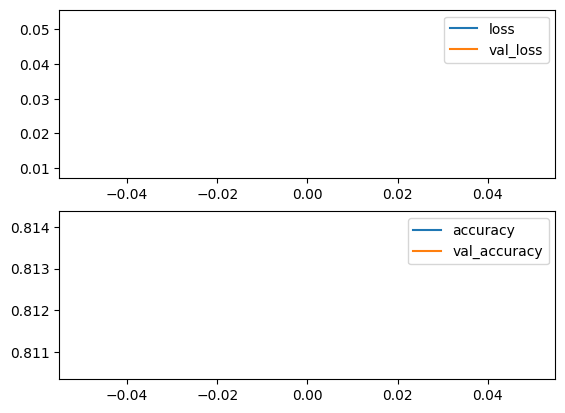

In [14]:
plt.subplot(2,1,1)
plt.plot( history.history['loss'], label = 'loss')
plt.plot( history.history['val_loss'], label = 'val_loss')
plt.legend(loc = 'best')
plt.subplot(2,1,2)
plt.plot( history.history['accuracy'], label = 'accuracy')
plt.plot( history.history['val_accuracy'], label = 'val_accuracy')
plt.legend(loc = 'best')
plt.show()

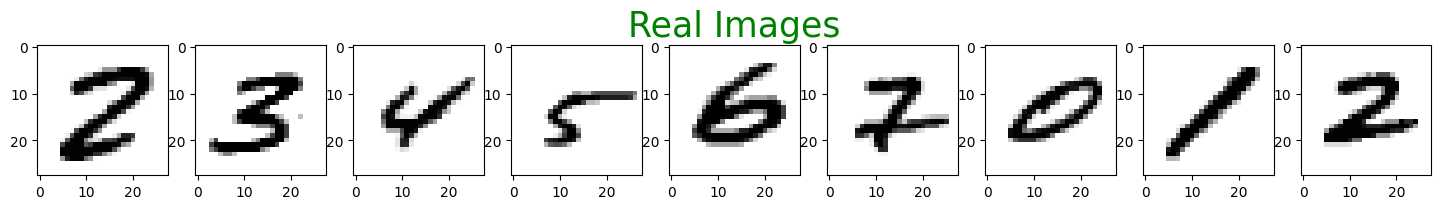

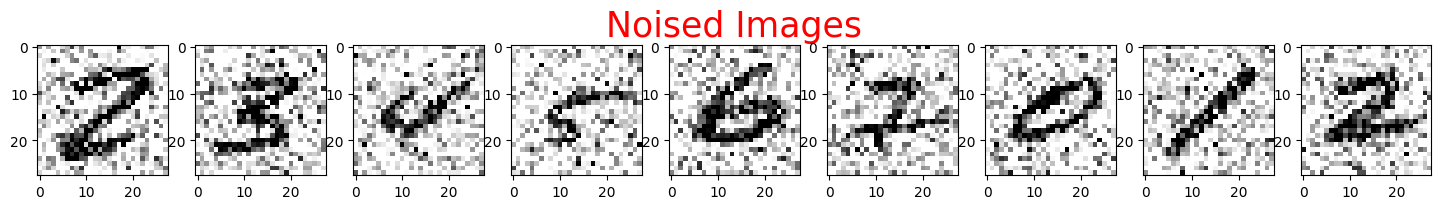

1/1 [==============================] - 0s 57ms/step


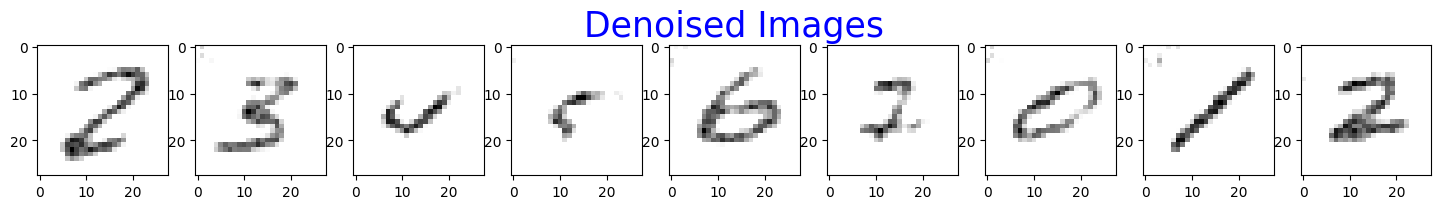

In [15]:
plt.figure(figsize = (18,18))
for i in range(10,19):
    plt.subplot(9,9,i)
    if(i == 14):
        plt.title('Real Images', fontsize = 25, color = 'Green')
    plt.imshow(test_images[i].reshape(1,28,28)[0], cmap = plt.cm.binary)
plt.show()


plt.figure(figsize = (18,18))
for i in range(10,19):
    if(i == 15):
        plt.title('Noised Images', fontsize = 25, color = 'red')
    plt.subplot(9,9,i)
    plt.imshow(test_noisy_images[i].reshape(1,28,28)[0], cmap = plt.cm.binary)
plt.show()


plt.figure(figsize = (18,18))
for i in range(10,19):
    if(i == 15):
        plt.title('Denoised Images', fontsize = 25, color = 'Blue')

    plt.subplot(9,9,i)
    plt.imshow(model.predict(test_noisy_images[i].reshape(1,28,28,1)).reshape(1,28,28)[0], cmap = plt.cm.binary)
plt.show()